<a href="https://colab.research.google.com/github/Alamgir-JUST/TACNet/blob/main/Coding/TACNet_with_DNN_EdgeIIoT_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
# Set font size and family for the entire figure
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Access the file in Google Drive
df = pd.read_csv("/content/drive/MyDrive/IIoT/DNN-EdgeIIoT-dataset.csv")

/tmp/ipython-input-3249999050.py:2: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/IIoT/DNN-EdgeIIoT-dataset.csv")


In [ ]:
df.shape

(2219201, 63)

In [ ]:
df

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,2021 23:24:32.816050000,166.75.162.225,192.168.0.128,0,0.0,0.0,0,31814.0,45620.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219197,2021 23:24:32.816595000,70.162.34.183,192.168.0.128,0,0.0,0.0,0,27718.0,45636.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219198,2021 23:24:32.818043000,40.13.95.244,192.168.0.128,0,0.0,0.0,0,18502.0,45672.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219199,2021 23:24:32.820831000,18.132.75.125,192.168.0.128,0,0.0,0.0,0,1862.0,45737.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [ ]:
df['Attack_type'].value_counts()

,count
Attack_type,
Normal,1615643
DDoS_UDP,121568
DDoS_ICMP,116436
SQL_injection,51203
Password,50153
Vulnerability_scanner,50110
DDoS_TCP,50062
DDoS_HTTP,49911
Uploading,37634


# **Data Preprocessing**

In [ ]:
df

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,2021 23:24:32.816050000,166.75.162.225,192.168.0.128,0,0.0,0.0,0,31814.0,45620.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219197,2021 23:24:32.816595000,70.162.34.183,192.168.0.128,0,0.0,0.0,0,27718.0,45636.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219198,2021 23:24:32.818043000,40.13.95.244,192.168.0.128,0,0.0,0.0,0,18502.0,45672.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219199,2021 23:24:32.820831000,18.132.75.125,192.168.0.128,0,0.0,0.0,0,1862.0,45737.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


## **Handle Missing Values**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

print("Columns with Missing Values:\n", missing_values)


Columns with Missing Values:
 Series([], dtype: int64)


In [ ]:


# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if missing values are filled
print("Missing values after filling:\n", df.isnull().sum().sum())  # Should be 0 if all missing values are handled


Missing values after filling:
 0


In [ ]:
df.shape

(2219201, 63)

In [ ]:
# Remove unnecessary columns that are not useful for attack prediction
columns_to_drop = ['Attack_label']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # errors='ignore' avoids error if column is missing

print("Remaining columns after dropping:", df.shape[1])


Remaining columns after dropping: 62


In [ ]:
# Print the names of the features (columns)
print(df.columns)

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Preprocessing steps
# Replace infinity and large values with NaNs
#df = df.replace([np.inf, -np.inf], np.nan)
#df = df.replace(to_replace=[r'^(-?\d+\.\d+e\+\d+|-?\d+\.\d+e-\d+|-?\d+\.\d+|-?\d+)$', r'^(-?\d+)$'], value=np.nan, regex=True)

# Drop rows containing NaNs
#df.dropna(inplace=True)

# Separate numerical and categorical columns, excluding the 'Label' column from categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols.difference(['Attack_type'])

# Normalize numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Ensure all categorical values are strings
df[cat_cols] = df[cat_cols].astype(str)

# Encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

# Display the processed DataFrame
df

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_type
0,57650,58101,22987,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,-0.276987,-0.197157,0,0,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Normal
1,57651,58100,22988,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,0.093235,5.072089,2,0,-0.197134,5.072089,-0.007583,-0.007155,-0.006838,Normal
2,57652,58101,22987,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,-0.276987,-0.197157,0,0,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Normal
3,57653,58101,22987,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,0.463456,-0.197157,0,0,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Normal
4,57654,58100,22988,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,0.833678,-0.197157,0,2,5.072692,-0.197157,-0.007583,-0.007155,-0.006838,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,2093397,43780,22988,0,-0.048563,-0.051428,0,3.528228,4.929494,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,DDoS_ICMP
2219197,2093398,121518,22988,0,-0.048563,-0.051428,0,3.047848,4.931297,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,DDoS_ICMP
2219198,2093399,104154,22988,0,-0.048563,-0.051428,0,1.966992,4.935356,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,DDoS_ICMP
2219199,2093400,50370,22988,0,-0.048563,-0.051428,0,0.015448,4.942683,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,DDoS_ICMP


In [ ]:
X = df.drop(columns=['Attack_type'])
y = df['Attack_type']

In [ ]:
df.shape

(2219201, 62)

In [ ]:
df['Attack_type'].value_counts()

,count
Attack_type,
Normal,1615643
DDoS_UDP,121568
DDoS_ICMP,116436
SQL_injection,51203
Password,50153
Vulnerability_scanner,50110
DDoS_TCP,50062
DDoS_HTTP,49911
Uploading,37634


In [ ]:
# Sample 10% from each class except 'MITM' and 'Fingerprinting'
df_filtered = df[~df['Attack_type'].isin(['MITM', 'Fingerprinting'])]

# Sample 10% from each remaining class
df_sampled = df_filtered.groupby('Attack_type').apply(lambda x: x.sample(frac=0.1, random_state=42))

# Extract 'MITM' and 'Fingerprinting' without sampling
df_mitm_fingerprinting = df[df['Attack_type'].isin(['MITM', 'Fingerprinting'])]

# Combine the sampled data with the MITM and Fingerprinting data
df_final = pd.concat([df_sampled, df_mitm_fingerprinting])

# Optionally, reset the index
df_final = df_final.reset_index(drop=True)

# Print the value counts for the final dataframe
print(df_final['Attack_type'].value_counts())


/tmp/ipython-input-2097974919.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_filtered.groupby('Attack_type').apply(lambda x: x.sample(frac=0.1, random_state=42))


Attack_type
Normal                   161564
DDoS_UDP                  12157
DDoS_ICMP                 11644
SQL_injection              5120
Password                   5015
Vulnerability_scanner      5011
DDoS_TCP                   5006
DDoS_HTTP                  4991
Uploading                  3763
Backdoor                   2486
Port_Scanning              2256
XSS                        1592
MITM                       1214
Ransomware                 1092
Fingerprinting             1001
Name: count, dtype: int64


In [ ]:
df = df_final.copy()

In [ ]:
df['Attack_type'].value_counts()

,count
Attack_type,
Normal,161564
DDoS_UDP,12157
DDoS_ICMP,11644
SQL_injection,5120
Password,5015
Vulnerability_scanner,5011
DDoS_TCP,5006
DDoS_HTTP,4991
Uploading,3763


In [ ]:
df.shape

(223912, 62)

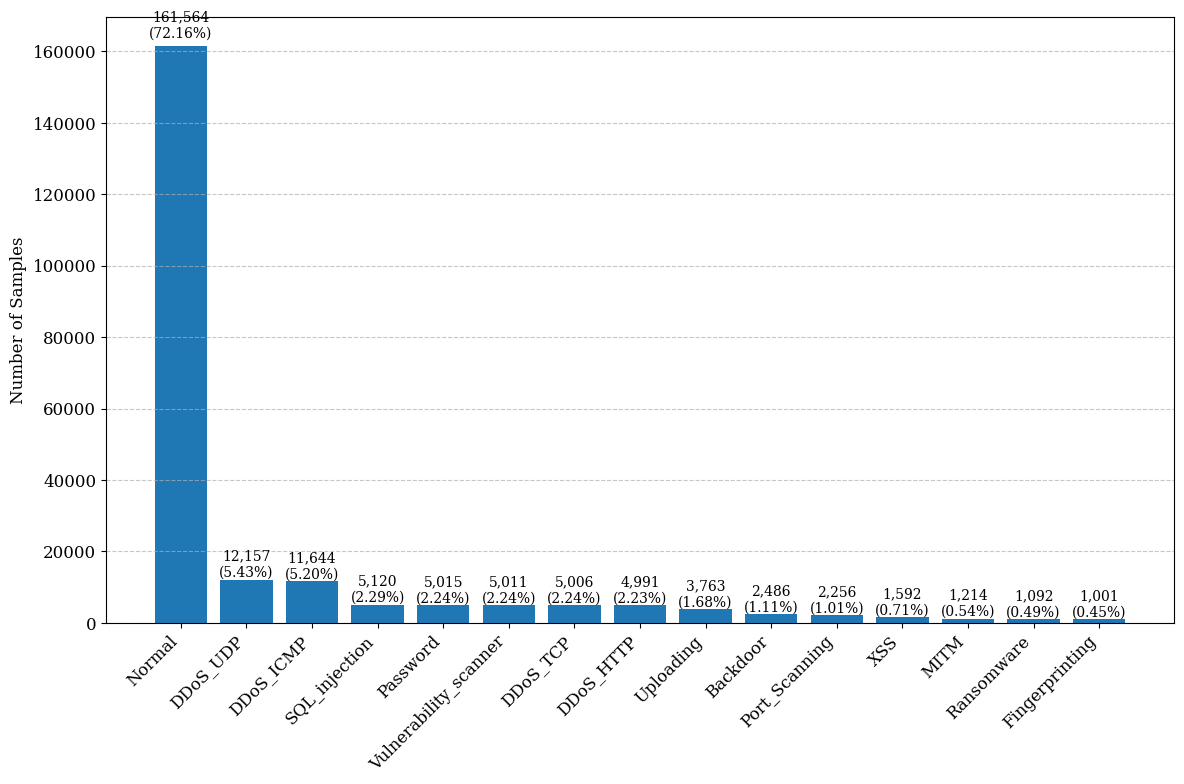

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is final_df

# Count samples and percentages
label_counts = df['Attack_type'].value_counts()
label_percentages = (label_counts / label_counts.sum()) * 100

# Set up the plot
plt.figure(figsize=(12, 8))
bars = plt.bar(label_counts.index, label_counts.values)

# Add count and percentage text above each bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    count_text = f'{label_counts.values[idx]:,}'
    percent_text = f'({label_percentages.values[idx]:.2f}%)'

    plt.text(
        bar.get_x() + bar.get_width()/2, height + 0.01*height,
        f'{count_text}\n{percent_text}',
        ha='center', va='bottom', fontsize=10
    )

# Titles and labels
#plt.title('Drone IDS Dataset: Data Samples per Attack Type (Count & %)', fontsize=18)
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
df

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_type
0,1483510,58101,22989,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Backdoor
1,1532236,0,0,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Backdoor
2,823063,0,0,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Backdoor
3,1512262,58101,22989,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Backdoor
4,787696,58103,22988,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Backdoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223907,1872039,58101,22989,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Fingerprinting
223908,1872072,58103,22988,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Fingerprinting
223909,1872073,58101,22989,0,-0.048563,-0.051428,0,-0.202928,-0.213412,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Fingerprinting
223910,1872264,0,0,8,14.564407,19.444572,5,-0.202928,-0.213412,-0.006116,...,-0.276987,-0.197157,1,1,-0.197134,-0.197157,-0.007583,-0.007155,-0.006838,Fingerprinting


In [ ]:
!pip install tensorflow

# **Proposed TACNet Model**

In [ ]:
# ✅ Imports
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, BatchNormalization, Conv1D,
    GlobalMaxPooling1D, Concatenate, Bidirectional, GRU,
    Multiply, Permute, Lambda, Reshape, LSTM
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# ✅ Channel Attention Block (with Lambda wrapper)
def channel_attention(input_tensor, reduction_ratio=8):
    channel = input_tensor.shape[-1]
    avg_pool = Lambda(lambda x: tf.reduce_mean(x, axis=1, keepdims=True))(input_tensor)
    dense_1 = Dense(channel // reduction_ratio, activation='relu')(avg_pool)
    dense_2 = Dense(channel, activation='sigmoid')(dense_1)
    return Multiply()([input_tensor, dense_2])

# ✅ Temporal Attention Block
def temporal_attention(input_seq):
    permuted = Permute((2, 1))(input_seq)
    attention = Dense(input_seq.shape[1], activation='softmax')(permuted)
    attention = Permute((2, 1))(attention)
    return Multiply()([input_seq, attention])

# ✅ Multi-scale Temporal Convolution + LSTM
def multi_scale_lstm_block(input_seq):
    cnn3 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_seq)
    cnn5 = Conv1D(64, kernel_size=5, activation='relu', padding='same')(input_seq)
    cnn7 = Conv1D(64, kernel_size=7, activation='relu', padding='same')(input_seq)

    cnn_concat = Concatenate()([cnn3, cnn5, cnn7])
    cnn_concat = BatchNormalization()(cnn_concat)
    cnn_concat = Dropout(0.3)(cnn_concat)

    # Apply LSTM to capture temporal dependencies
    lstm_out = LSTM(128, return_sequences=True)(cnn_concat)

    return lstm_out

# ✅ TACNet Model Definition with Multi-Scale and LSTM Block
def TACNET(input_dim, num_classes):
    inputs = Input(shape=(input_dim,))
    x = Reshape((input_dim, 1))(inputs)

    # Multi-scale CNN + LSTM Block
    rnn_out = multi_scale_lstm_block(x)

    # Temporal Attention
    temporal_out = temporal_attention(rnn_out)

    # Channel Attention
    channel_out = channel_attention(temporal_out)

    # Global Pooling + Final Classifier
    pooled = GlobalMaxPooling1D()(channel_out)
    x = Dense(128, activation='relu')(pooled)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# ✅ Load the Data (Assuming you already have the preprocessed dataframe 'df')
X = df.drop(columns=['Attack_type']).astype('float32')
y = df['Attack_type']

# ✅ Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

# ✅ Handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(zip(np.unique(y_encoded), class_weights))

# ✅ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# ✅ Build the Updated Model
model = TACNET(input_dim=X.shape[1], num_classes=len(class_names))

# ✅ Compile Model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Callbacks (EarlyStopping and ModelCheckpoint)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("TACNET_MODEL.h5", save_best_only=True)

# ✅ Custom Callback to store additional metrics like Precision, Recall, F1 score
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_train, y_train, X_val, y_val):
        super(MetricsCallback, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.history = {'train_loss': [], 'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
                        'val_loss': [], 'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': []}

    def on_epoch_end(self, epoch, logs=None):
        # Training metrics
        y_train_pred = np.argmax(self.model.predict(self.X_train), axis=-1)
        train_precision = precision_score(self.y_train, y_train_pred, average='weighted')
        train_recall = recall_score(self.y_train, y_train_pred, average='weighted')
        train_f1 = f1_score(self.y_train, y_train_pred, average='weighted')

        # Validation metrics
        y_val_pred = np.argmax(self.model.predict(self.X_val), axis=-1)
        val_precision = precision_score(self.y_val, y_val_pred, average='weighted')
        val_recall = recall_score(self.y_val, y_val_pred, average='weighted')
        val_f1 = f1_score(self.y_val, y_val_pred, average='weighted')

        # Storing metrics in the history
        self.history['train_loss'].append(logs['loss'])
        self.history['train_accuracy'].append(logs['accuracy'])
        self.history['train_precision'].append(train_precision)
        self.history['train_recall'].append(train_recall)
        self.history['train_f1'].append(train_f1)
        self.history['val_loss'].append(logs['val_loss'])
        self.history['val_accuracy'].append(logs['val_accuracy'])
        self.history['val_precision'].append(val_precision)
        self.history['val_recall'].append(val_recall)
        self.history['val_f1'].append(val_f1)

# ✅ Training the Model with Custom Metrics Callback
metrics_callback = MetricsCallback(X_train, y_train, X_test, y_test)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=1024,
    callbacks=[early_stop, checkpoint, metrics_callback],
    class_weight=class_weight_dict,
    verbose=1
)

# ✅ Displaying the collected metrics after training
print("Training and Validation Metrics:")
print(f"Train Loss: {metrics_callback.history['train_loss']}")
print(f"Train Accuracy: {metrics_callback.history['train_accuracy']}")
print(f"Train Precision: {metrics_callback.history['train_precision']}")
print(f"Train Recall: {metrics_callback.history['train_recall']}")
print(f"Train F1 Score: {metrics_callback.history['train_f1']}")
print(f"Validation Loss: {metrics_callback.history['val_loss']}")
print(f"Validation Accuracy: {metrics_callback.history['val_accuracy']}")
print(f"Validation Precision: {metrics_callback.history['val_precision']}")
print(f"Validation Recall: {metrics_callback.history['val_recall']}")
print(f"Validation F1 Score: {metrics_callback.history['val_f1']}")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 61)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 61, 1)     │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 61, 64)    │        256 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 61, 64)    │        384 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 61, 64)    │        512 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 61, 192)   │          0 │ conv1d[0][0],     │
│ (Concatenate)       │                   │            │ conv1d_1[0][0],   │
│                     │                   │            │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 61, 192)   │        768 │ concatenate[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 61, 192)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 61, 128)   │    164,352 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 128, 61)   │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128, 61)   │      3,782 │ permute[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_1 (Permute) │ (None, 61, 128)   │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 61, 128)   │          0 │ lstm[0][0],       │
│                     │                   │            │ permute_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 1, 128)    │          0 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1, 16)     │      2,064 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1, 128)    │      2,176 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 61, 128)   │          0 │ multiply[0][0],   │
│ (Multiply)          │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ multiply_1[0][0]  │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     16,512 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 15)        │      1,935 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 192,741 (752.89 KB)

 Trainable params: 192,357 (751.39 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1061 - loss: 2.4387

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 255s 46ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 745s 5s/step - accuracy: 0.1071 - loss: 2.4350 - val_accuracy: 0.5206 - val_loss: 1.9975
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6171 - loss: 0.8025

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 254s 45ms/step
   1/1400 ━━━━━━━━━━━━━━━━━━━━ 1:17 55ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 701s 5s/step - accuracy: 0.6176 - loss: 0.8015 - val_accuracy: 0.7766 - val_loss: 1.3169
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8491 - loss: 0.3767

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 247s 44ms/step
   1/1400 ━━━━━━━━━━━━━━━━━━━━ 1:16 55ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 698s 5s/step - accuracy: 0.8494 - loss: 0.3763 - val_accuracy: 0.8535 - val_loss: 1.0522
Epoch 4/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9568 - loss: 0.2128

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 257s 46ms/step
   1/1400 ━━━━━━━━━━━━━━━━━━━━ 1:26 62ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 681s 5s/step - accuracy: 0.9568 - loss: 0.2127 - val_accuracy: 0.8696 - val_loss: 0.9665
Epoch 5/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9782 - loss: 0.1453

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 260s 46ms/step
   1/1400 ━━━━━━━━━━━━━━━━━━━━ 1:21 58ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 762s 5s/step - accuracy: 0.9782 - loss: 0.1453 - val_accuracy: 0.8783 - val_loss: 0.6126
Epoch 6/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5598/5598 ━━━━━━━━━━━━━━━━━━━━ 270s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 64s 46ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 770s 5s/step - accuracy: 0.9856 - loss: 0.1164 - val_accuracy: 0.8715 - val_loss: 0.6807
Epoch 7/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5598/5598 ━━━━━━━━━━━━━━━━━━━━ 259s 46ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 70s 50ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 689s 5s/step - accuracy: 0.9866 - loss: 0.1065 - val_accuracy: 0.8788 - val_loss: 0.6919
Epoch 8/10


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9884 - loss: 0.0984

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 252s 45ms/step
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 748s 5s/step - accuracy: 0.9884 - loss: 0.0983 - val_accuracy: 0.9632 - val_loss: 0.1301
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9911 - loss: 0.0791

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 254s 45ms/step
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 707s 5s/step - accuracy: 0.9911 - loss: 0.0791 - val_accuracy: 0.9747 - val_loss: 0.0754
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9902 - loss: 0.0743

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 261s 47ms/step
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 61s 44ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 761s 5s/step - accuracy: 0.9902 - loss: 0.0744 - val_accuracy: 0.9851 - val_loss: 0.0399
Training and Validation Metrics:
Train Loss: [1.9212433099746704, 0.6712791323661804, 0.3218076825141907, 0.19577766954898834, 0.13908515870571136, 0.11772306263446808, 0.10648275166749954, 0.09215249866247177, 0.07940158993005753, 0.0830354392528534]
Train Accuracy: [0.2427932471036911, 0.6819605827331543, 0.8868132829666138, 0.9643203616142273, 0.9796654582023621, 0.9846758246421814, 0.9864692091941833, 0.9893861413002014, 0.9909003973007202, 0.9898187518119812]
Train Precision: [0.7477502094786241, 0.723367666443935, 0.769329810520604, 0.8039628706613849, 0.9039787030508906, 0.8673620326602827, 0.8663153578151994, 0.9839794507808861, 0.9909055427831349, 0.9909087118684505]
Train Recall: [0.5229136544054843, 0.7773280708316354, 0.8554337935231034, 0.8714892619285542, 0.879896610

### **Accuracy, Pr, Re, F1**

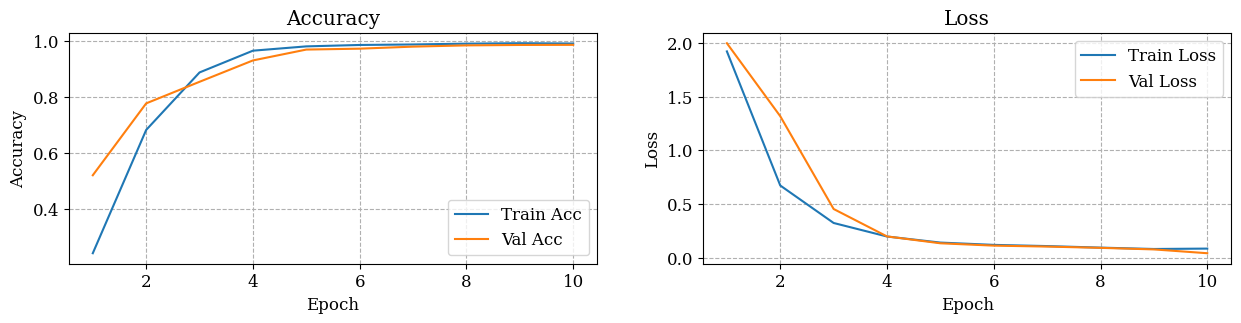

In [ ]:
import matplotlib.pyplot as plt

# === 6. PLOT METRICS ===
def plot_training_metrics(history):
    history_dict = history.history
    epochs = range(1, len(history_dict['loss']) + 1)

    plt.figure(figsize=(15, 3))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_dict['accuracy'], label='Train Acc')
    plt.plot(epochs, history_dict['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['loss'], label='Train Loss')
    plt.plot(epochs, history_dict['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

# Plot training curves
plot_training_metrics(history)


In [ ]:
# === 6. PLOT METRICS ===
def plot_training_metrics(history_obj, metrics_callback):
    # Extract metrics
    history_dict = history_obj.history
    epochs = range(1, len(history_dict['loss']) + 1)

    # === Plot Precision, Recall, F1 ===
    metrics = metrics_callback.history
    plt.figure(figsize=(18, 4))

    # Precision
    plt.subplot(1, 3, 1)
    plt.plot(epochs, metrics['train_precision'], label='Train Precision')
    plt.plot(epochs, metrics['val_precision'], label='Val Precision')
    plt.title('Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

    # Recall
    plt.subplot(1, 3, 2)
    plt.plot(epochs, metrics['train_recall'], label='Train Recall')
    plt.plot(epochs, metrics['val_recall'], label='Val Recall')
    plt.title('Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

    # F1 Score
    plt.subplot(1, 3, 3)
    plt.plot(epochs, metrics['train_f1'], label='Train F1')
    plt.plot(epochs, metrics['val_f1'], label='Val F1')
    plt.title('F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(linestyle='--')  # Dashed grid

    plt.tight_layout()
    plt.show()

# ✅ Call the function to plot
plot_training_metrics(history, metrics_callback)


NameError: name 'metrics_callback' is not defined

### **Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Predict on training and validation data
y_train_pred = np.argmax(model.predict(X_train), axis=-1)
y_test_pred = np.argmax(model.predict(X_test), axis=-1)

# Generate the classification report for training data
print("Classification Report for Training Data:")
train_report = classification_report(y_train, y_train_pred, target_names=class_names, digits=4)
print(train_report)

# Generate the classification report for test data
print("\nClassification Report for Test Data:")
test_report = classification_report(y_test, y_test_pred, target_names=class_names, digits=4)
print(test_report)


5598/5598 ━━━━━━━━━━━━━━━━━━━━ 296s 53ms/step
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 78s 56ms/step
Classification Report for Training Data:
                       precision    recall  f1-score   support

             Backdoor     0.9687    0.9804    0.9745      1989
            DDoS_HTTP     0.9985    0.9995    0.9990      3993
            DDoS_ICMP     1.0000    0.8724    0.9318      9315
             DDoS_TCP     0.9672    1.0000    0.9833      4005
             DDoS_UDP     1.0000    0.9993    0.9996      9725
       Fingerprinting     0.3950    0.9725    0.5618       801
                 MITM     0.9969    1.0000    0.9985       971
               Normal     0.9984    0.9984    0.9984    129251
             Password     0.9786    0.9462    0.9621      4012
        Port_Scanning     0.9993    0.8211    0.9015      1805
           Ransomware     0.6196    0.9989    0.7648       874
        SQL_injection     0.9901    0.9248    0.9563      4096
            Uploading     0.9757    0.9877    0.

### **Confusiion Matrix**

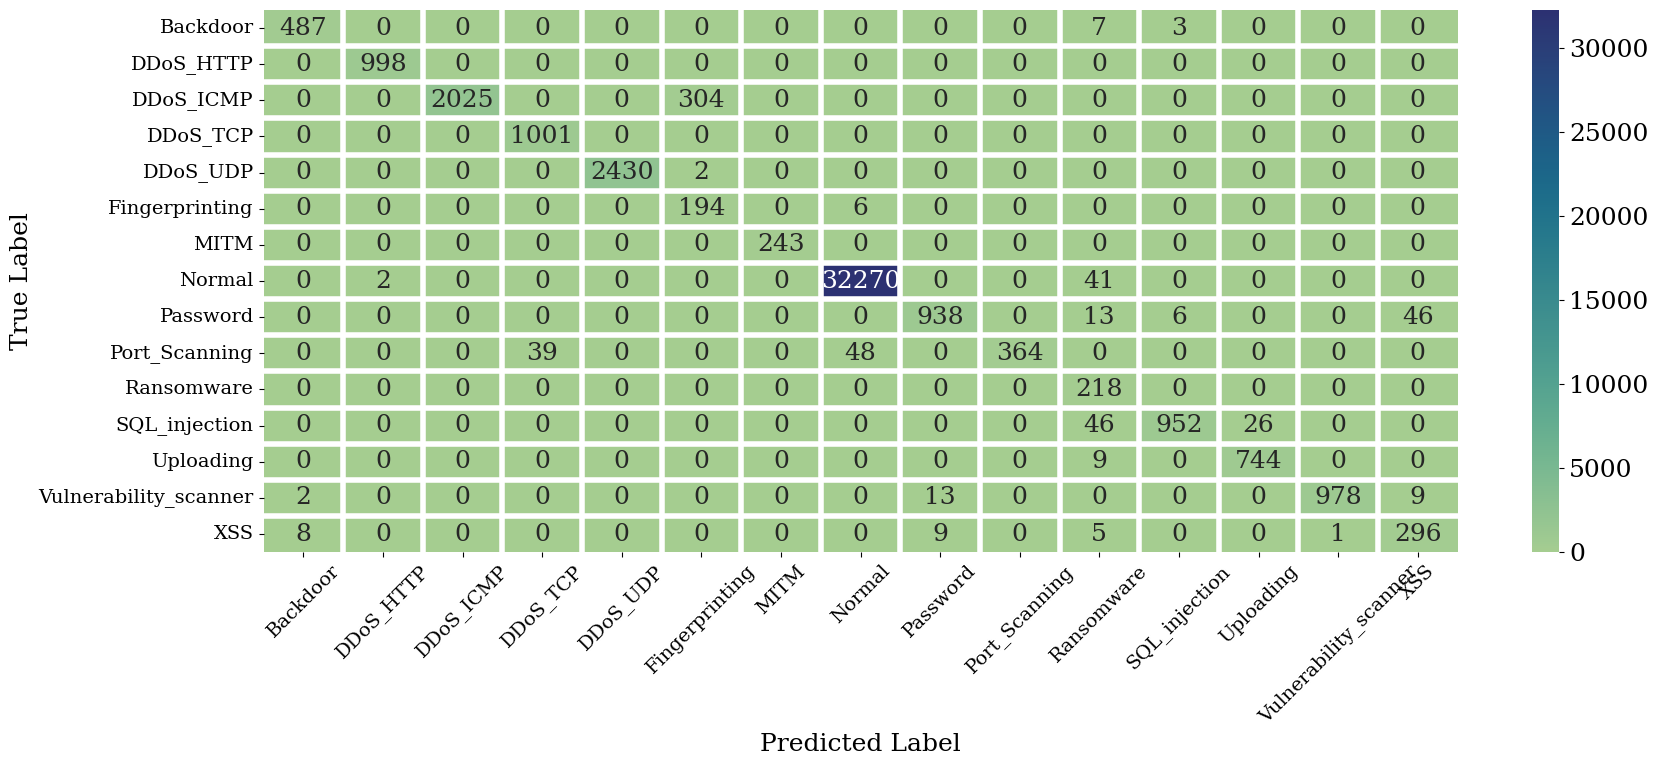

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set font properties globally (compatible with Google Colab)
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Step 2: Get class labels from label encoder
#label_names = label_encoder.classes_

# Step 3: Create a plot for the confusion matrix
fig, ax = plt.subplots(figsize=(18, 8))

# Step 4: Define the color map
cmap = sns.color_palette("crest", as_cmap=True)

# Step 5: Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, ax=ax,
            xticklabels=class_names, yticklabels=class_names, annot_kws={"fontsize": 18})

# Step 6: Customize the plot
#ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

# Rotate tick labels
ax.set_xticklabels(class_names, rotation=45, fontsize=14)
ax.set_yticklabels(class_names, rotation=0, fontsize=14)

# Optional: Add white gridlines between heatmap cells
for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.hlines([i for i in range(1, len(class_names))], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([i for i in range(1, len(class_names))], *ax.get_ylim(), colors='white', linewidth=4)

# Final layout and display
plt.tight_layout()
plt.show()


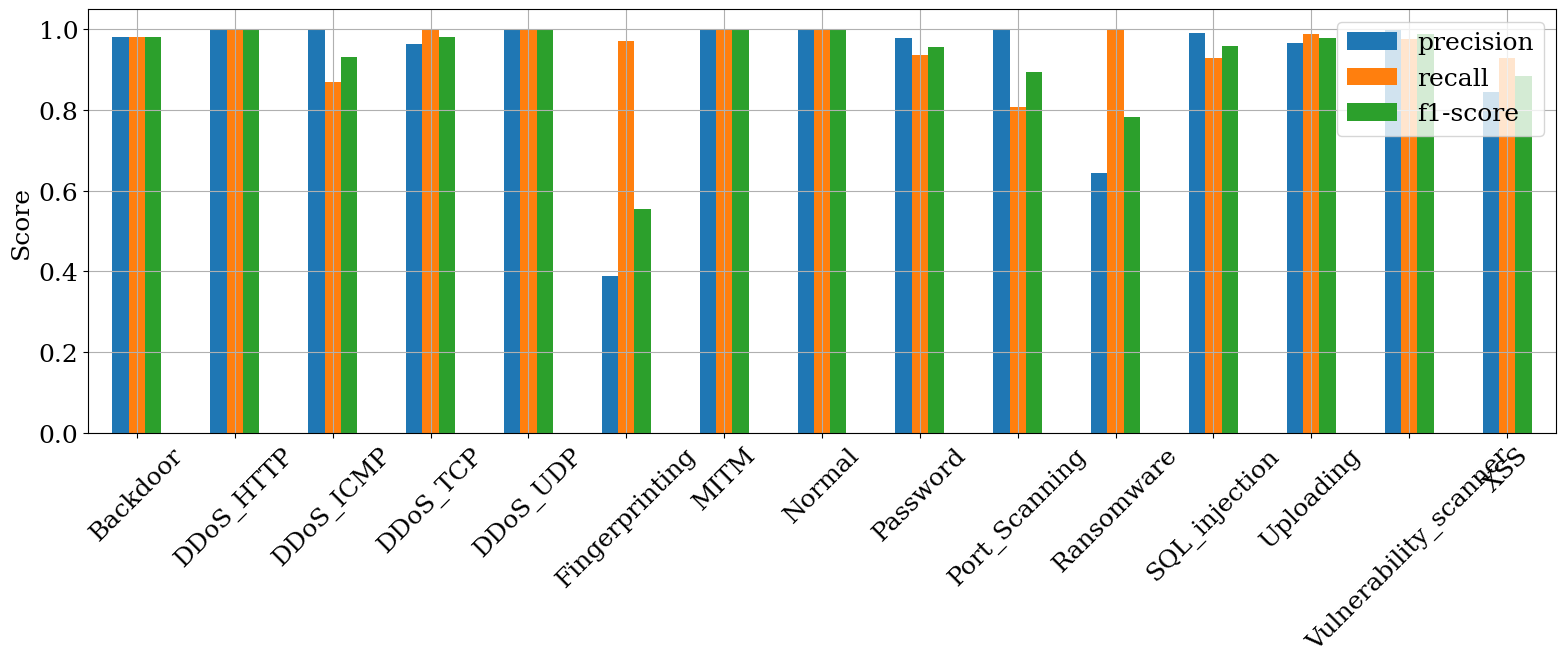

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Get detailed metrics
report_dict = classification_report(y_test, y_test_pred, target_names=class_names, output_dict=True)
df_metrics = pd.DataFrame(report_dict).T.iloc[:-3, :]  # remove avg/accuracy rows

df_metrics[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(16, 7))
#plt.title("Per-Class Precision, Recall, and F1-Score")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# **Thank you for viewing this Project!!**